In [19]:
# Section 1: Imports & Config
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import plotly.express as px
import calendar

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 100)


In [21]:
# Section 2: Load & Prepare Data

csv_filename = "SalesReport.csv"  # Your dataset file

if not os.path.exists(csv_filename):
    raise FileNotFoundError(f"❌ File '{csv_filename}' not found!")

data = pd.read_csv(csv_filename)

# Basic cleaning
data = data.dropna().drop_duplicates()

# Handle dates
date_columns = [col for col in data.columns if "date" in col.lower()]
for date_col in date_columns:
    try:
        data[date_col] = pd.to_datetime(data[date_col])
        data["Year"] = data[date_col].dt.year
        data["Month"] = data[date_col].dt.month
        data["Quarter"] = data[date_col].dt.quarter
        data["DayOfWeek"] = data[date_col].dt.day_name()
    except:
        pass

# Identify key columns
key_columns = {}
for col in data.columns:
    if "sales" in col.lower() or "revenue" in col.lower():
        key_columns["sales"] = col
    elif "store" in col.lower():
        key_columns["store"] = col
    elif "dept" in col.lower() or "department" in col.lower():
        key_columns["department"] = col
    elif "date" in col.lower():
        key_columns["date"] = col

print("✅ Data loaded:", data.shape)
print("🔑 Key columns:", key_columns)

data.head()


✅ Data loaded: (6435, 8)
🔑 Key columns: {'store': 'Store', 'date': 'Date', 'sales': 'Weekly_Sales'}


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


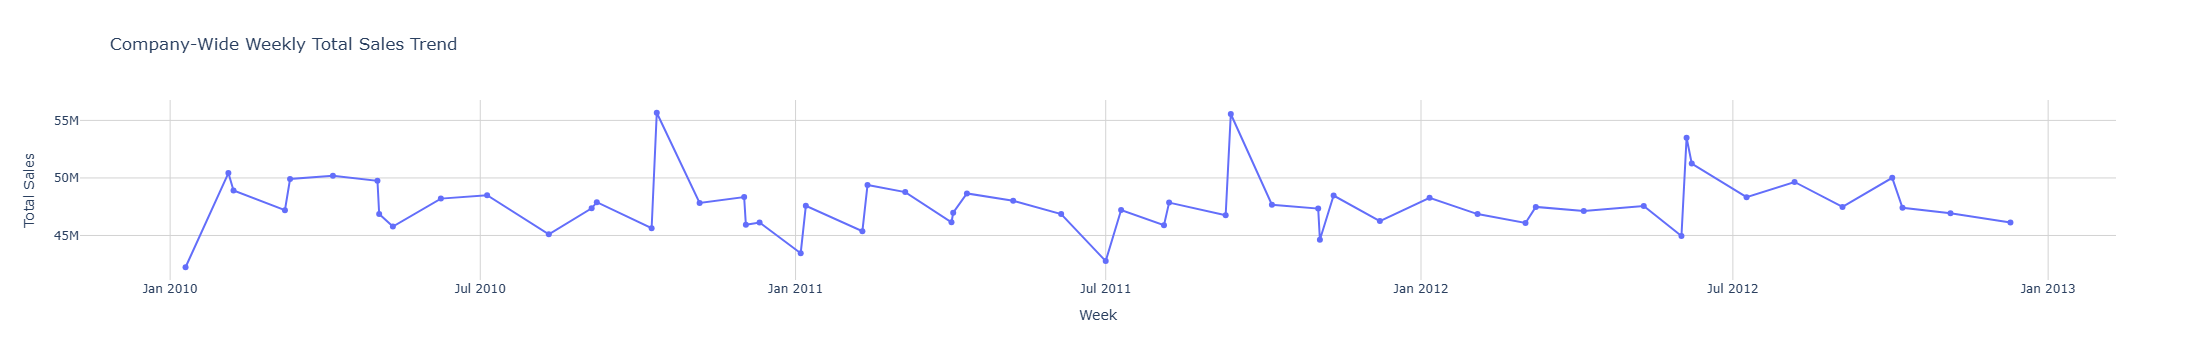

In [23]:
# Section 3: Trend Analysis (Weekly Aggregated for Executive Report)

if "Date" in data.columns and "sales" in key_columns:
    # Ensure Date column is datetime
    data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

    # Group by week (aggregate sales across all stores for the same week)
    weekly_sales = (
        data.groupby("Date")[key_columns["sales"]]
        .sum()
        .reset_index()
        .sort_values("Date")
    )

    # Plot Weekly Total Sales Trend
    fig = px.line(
        weekly_sales,
        x="Date",
        y=key_columns["sales"],
        markers=True,
        title="Company-Wide Weekly Total Sales Trend"
    )
    fig.update_layout(
        xaxis_title="Week",
        yaxis_title="Total Sales",
        plot_bgcolor="white",
        font=dict(size=12),
        xaxis=dict(showgrid=True, gridcolor="lightgrey"),
        yaxis=dict(showgrid=True, gridcolor="lightgrey")
    )
    fig.show()


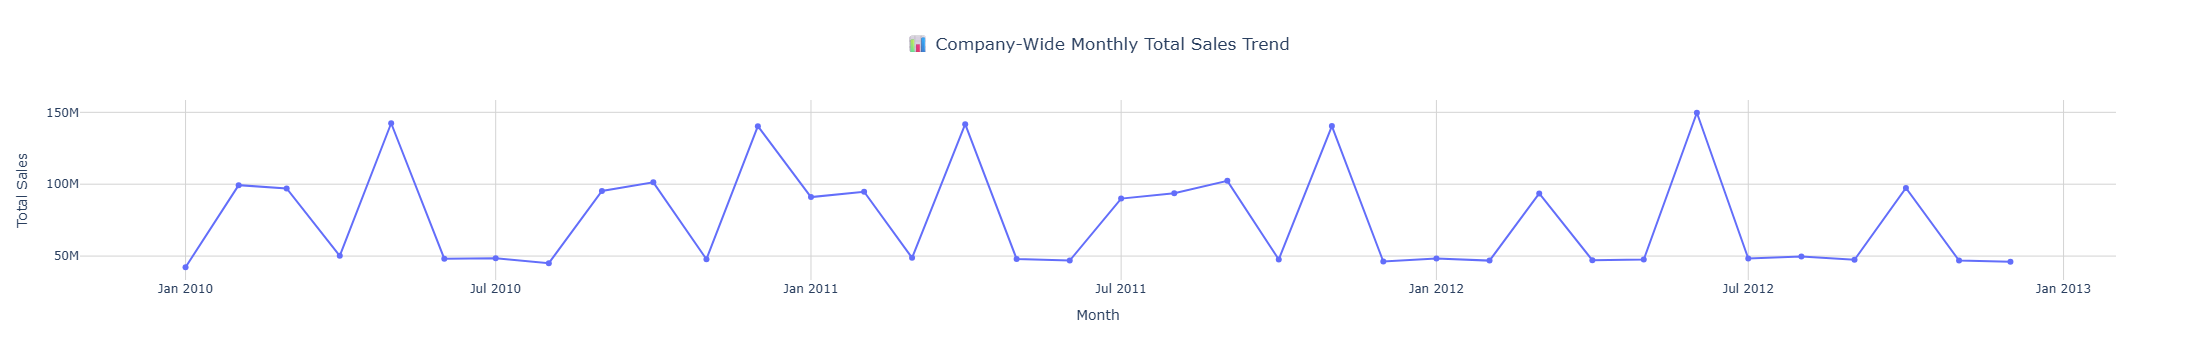

In [25]:
# Section 3: Trend Analysis (Monthly Aggregated for Executive Report)

if "Date" in data.columns and "sales" in key_columns:
    # Ensure Date column is datetime
    data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

    # Create Month column
    data["Month"] = data["Date"].dt.to_period("M")

    # Group by month (aggregate sales across all stores)
    monthly_sales = (
        data.groupby("Month")[key_columns["sales"]]
        .sum()
        .reset_index()
        .sort_values("Month")
    )

    # Convert Period back to timestamp for plotting
    monthly_sales["Month"] = monthly_sales["Month"].dt.to_timestamp()

    # Plot Monthly Total Sales Trend
    fig = px.line(
        monthly_sales,
        x="Month",
        y=key_columns["sales"],
        markers=True,
        title="📊 Company-Wide Monthly Total Sales Trend"
    )
    fig.update_layout(
        xaxis_title="Month",
        yaxis_title="Total Sales",
        plot_bgcolor="white",
        font=dict(size=12),
        xaxis=dict(showgrid=True, gridcolor="lightgrey"),
        yaxis=dict(showgrid=True, gridcolor="lightgrey"),
        title_x=0.5
    )
    fig.show()


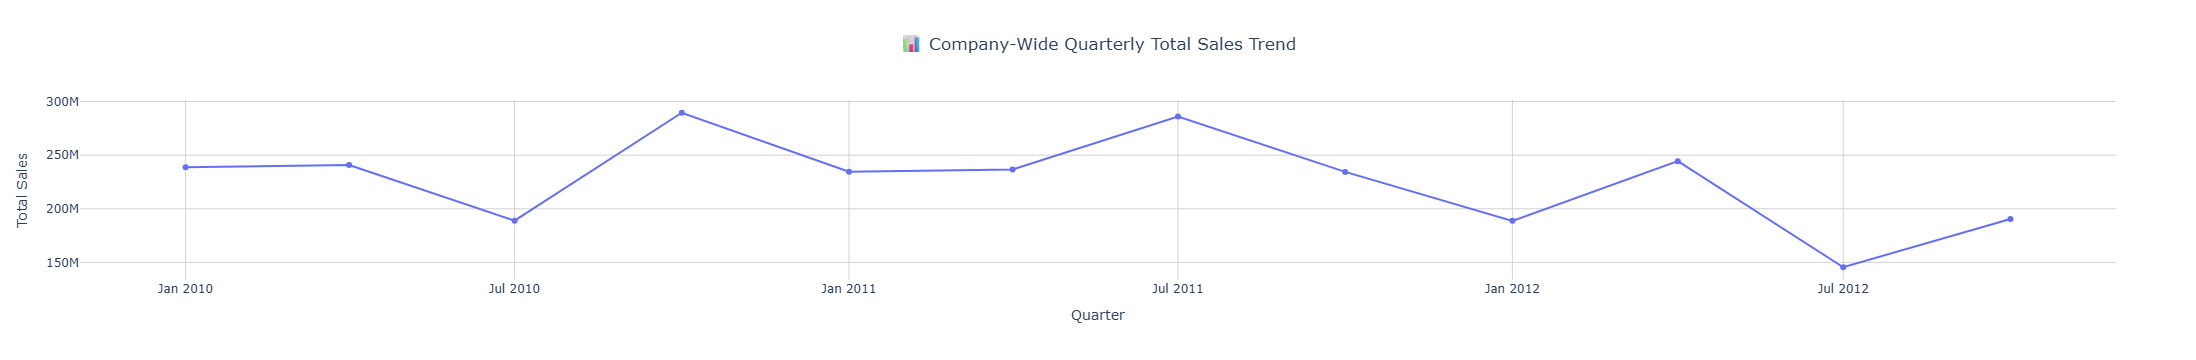

In [27]:
# Section 3: Trend Analysis (Quarterly Aggregated for Executive Report)

if "Date" in data.columns and "sales" in key_columns:
    # Ensure Date column is datetime
    data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

    # Create Quarter column
    data["Quarter"] = data["Date"].dt.to_period("Q")

    # Group by quarter (aggregate sales across all stores)
    quarterly_sales = (
        data.groupby("Quarter")[key_columns["sales"]]
        .sum()
        .reset_index()
        .sort_values("Quarter")
    )

    # Convert Period back to timestamp for plotting
    quarterly_sales["Quarter"] = quarterly_sales["Quarter"].dt.to_timestamp()

    # Plot Quarterly Total Sales Trend
    fig = px.line(
        quarterly_sales,
        x="Quarter",
        y=key_columns["sales"],
        markers=True,
        title="📊 Company-Wide Quarterly Total Sales Trend"
    )
    fig.update_layout(
        xaxis_title="Quarter",
        yaxis_title="Total Sales",
        plot_bgcolor="white",
        font=dict(size=12),
        xaxis=dict(showgrid=True, gridcolor="lightgrey"),
        yaxis=dict(showgrid=True, gridcolor="lightgrey"),
        title_x=0.5
    )
    fig.show()


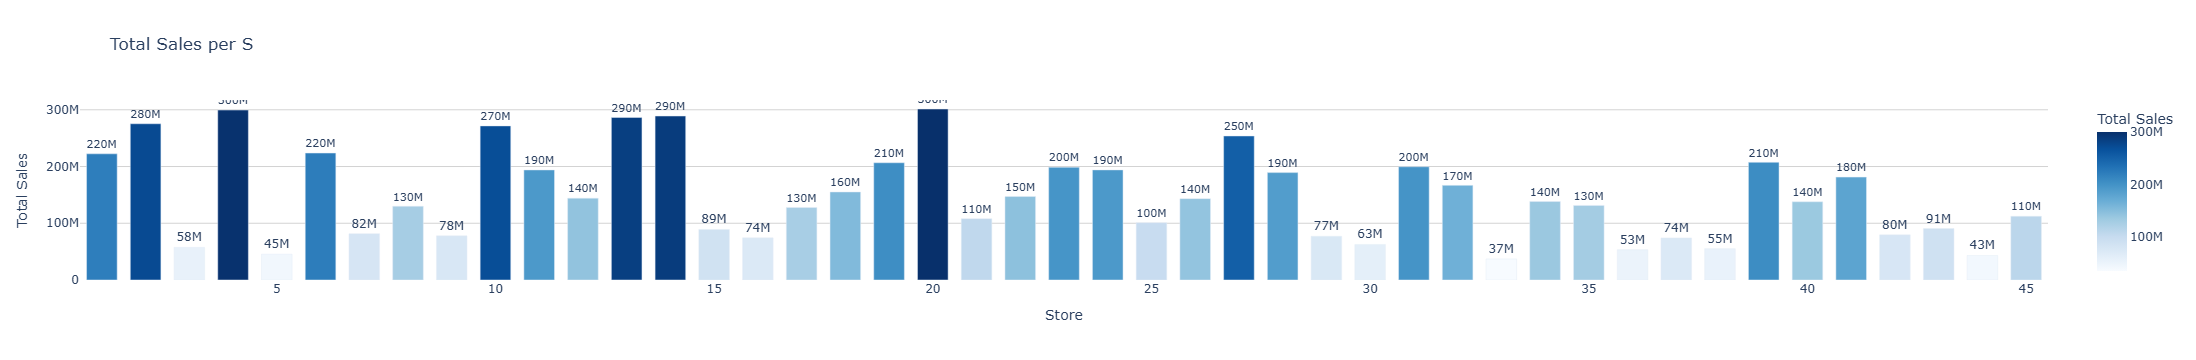

In [29]:
# Section 4: Store Analysis
if "store" in key_columns and "sales" in key_columns:
    # Group by store and remove any with 0 sales
    store_stats = (
        data.groupby(key_columns["store"])[key_columns["sales"]]
        .sum()
        .reset_index()
    )
    store_stats = store_stats[store_stats[key_columns["sales"]] > 0]

    # Sort ALL stores by total sales (descending)
    store_stats = store_stats.sort_values(by=key_columns["sales"], ascending=False)

    # Bar Chart of ALL Stores
    fig = px.bar(
        store_stats,
        x=key_columns["store"],
        y=key_columns["sales"],
        text=key_columns["sales"],
        title="Total Sales per S",
        labels={key_columns["store"]: "Store", key_columns["sales"]: "Total Sales"},
        color=key_columns["sales"],
        color_continuous_scale="Blues"
    )

    # Styling
    fig.update_traces(texttemplate='%{text:.2s}', textposition="outside")
    fig.update_layout(
        xaxis=dict(title="Store", categoryorder="total descending"),
        yaxis=dict(title="Total Sales", gridcolor="lightgrey"),
        plot_bgcolor="white",
        font=dict(size=12),
        bargap=0.3
    )

    fig.show()


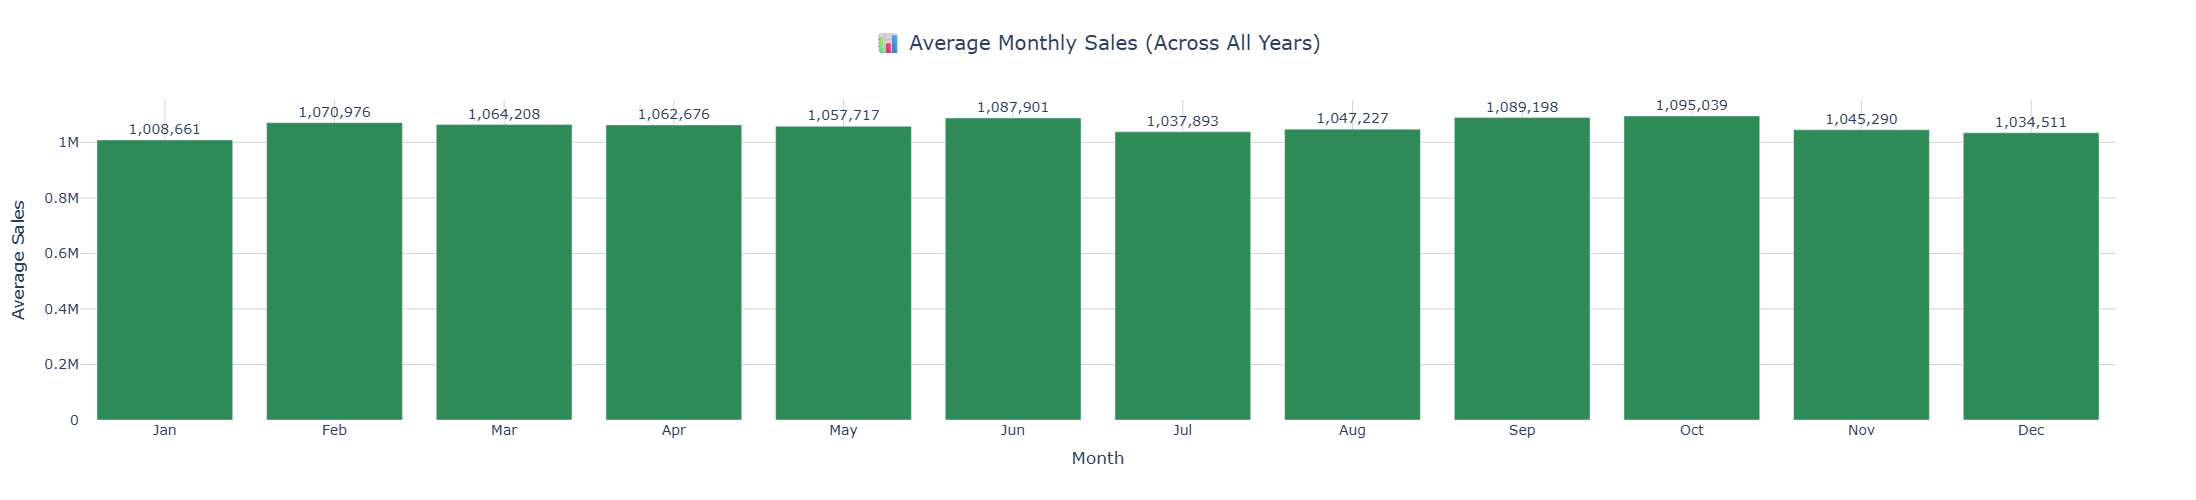

In [31]:
# Section 3: Trend Analysis (Average Monthly Sales Across Years)

if "Date" in data.columns and "sales" in key_columns:
    # Ensure Date column is datetime
    data["Date"] = pd.to_datetime(data["Date"], errors="coerce")

    # Extract Month (1-12)
    data["Month"] = data["Date"].dt.month

    # Group by month (average sales across all years for each month)
    avg_monthly_sales = (
        data.groupby("Month")[key_columns["sales"]]
        .mean()
        .reset_index()
        .sort_values("Month")
    )

    # Month number → abbreviation mapping
    month_map = {i: calendar.month_abbr[i] for i in range(1, 13)}
    avg_monthly_sales["Month"] = avg_monthly_sales["Month"].astype(int).map(month_map)

    # Plot Average Monthly Sales Trend
    fig = px.bar(
        avg_monthly_sales,
        x="Month",
        y=key_columns["sales"],
        text=key_columns["sales"],
        title="📊 Average Monthly Sales (Across All Years)"
    )

    # Beautify chart
    fig.update_traces(
        texttemplate='%{text:,.0f}',
        textposition="outside",
        marker_color="seagreen"
    )
    fig.update_layout(
        autosize=False,
        width=900,
        height=500,
        xaxis_title="Month",
        yaxis_title="Average Sales",
        plot_bgcolor="white",
        font=dict(size=14),
        xaxis=dict(
            categoryorder="array",
            categoryarray=[calendar.month_abbr[i] for i in range(1, 13)],
            showgrid=True,
            gridcolor="lightgrey"
        ),
        yaxis=dict(showgrid=True, gridcolor="lightgrey"),
        title_x=0.5
    )

    fig.show()


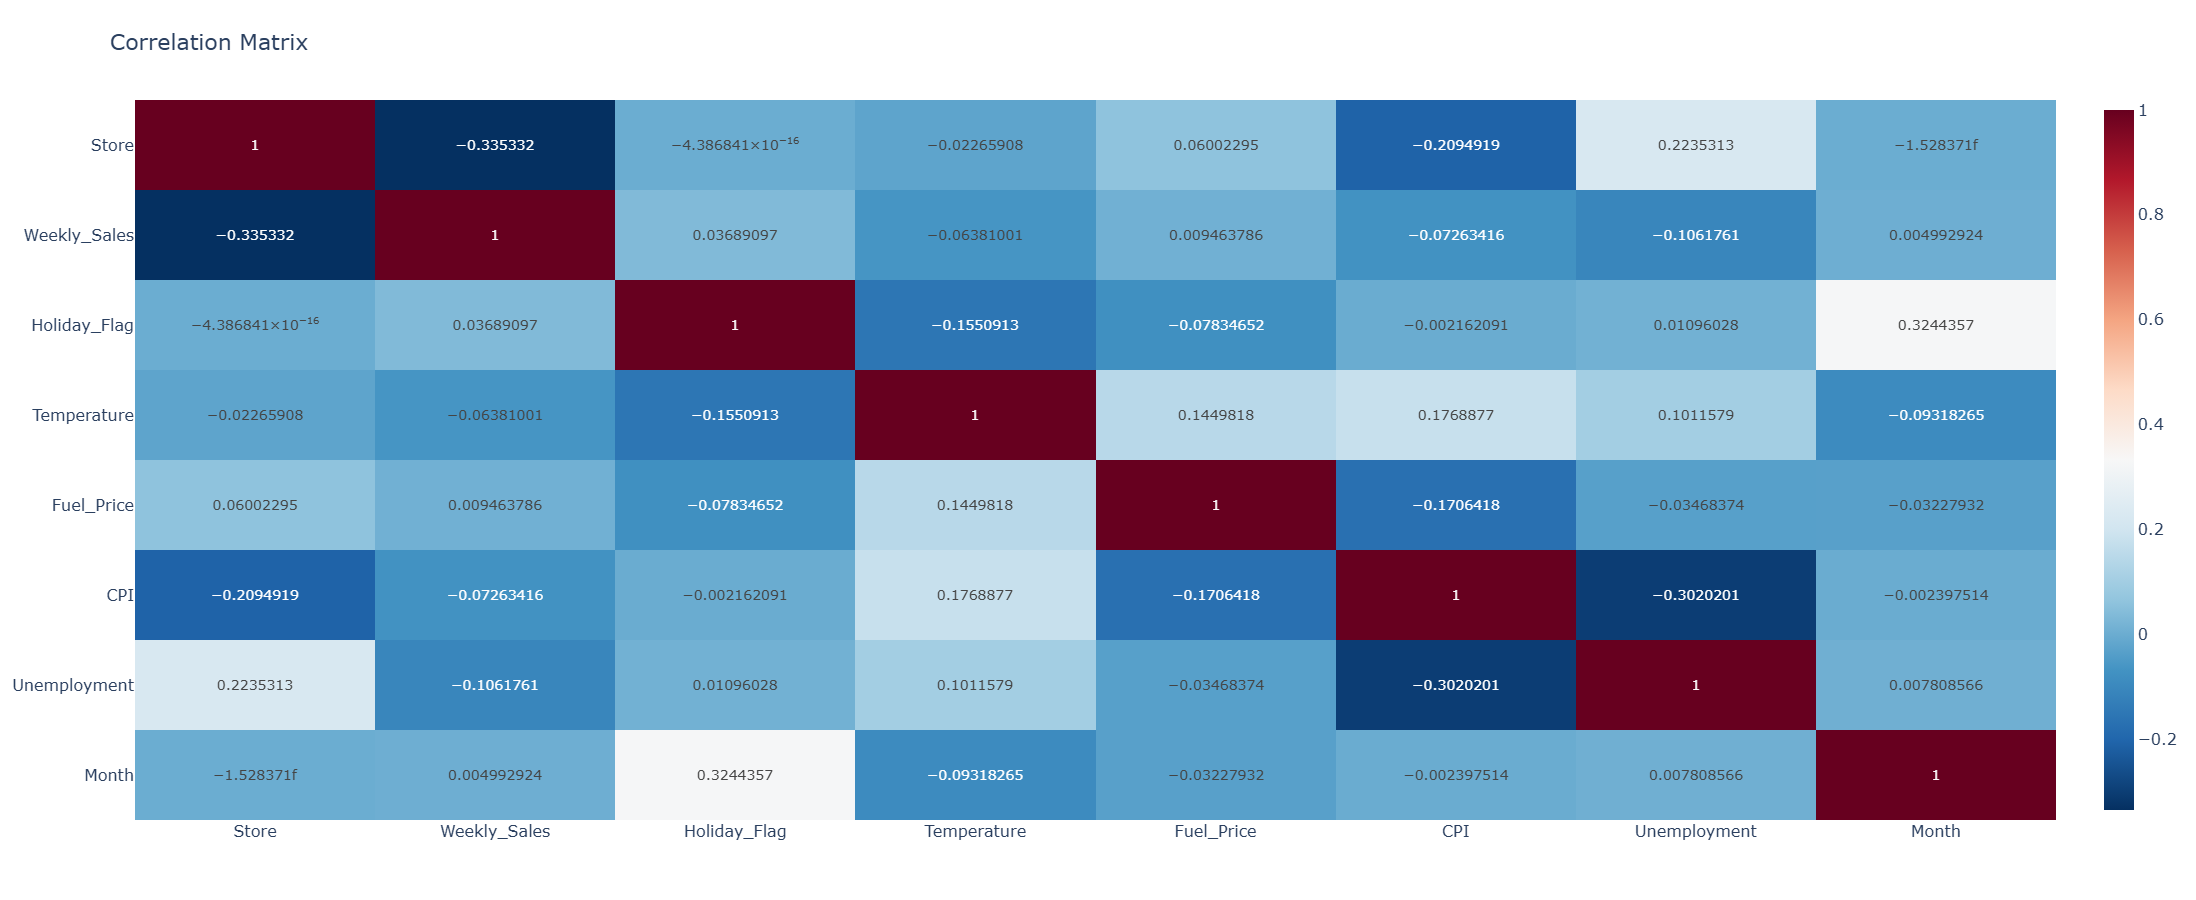

In [57]:
# Correlation
numeric_cols = data.select_dtypes(include=['number']).columns.tolist()
if len(numeric_cols) > 1:
    corr_matrix = data[numeric_cols].corr()
    fig = px.imshow(corr_matrix, text_auto=True, aspect="auto",
                    title="Correlation Matrix", color_continuous_scale="RdBu_r")
    fig.update_layout(
        width=1500,  # Width in pixels
        height=900,  # Height in pixels
        font=dict(size=16)  # Increase overall font size
    )
    # Increase the text size on the heatmap cells specifically
    fig.update_traces(
        textfont=dict(size=14)  # Increase font size for correlation values
    )
    fig.show()

In [69]:
    # --- Insights from correlation ---
    insights = []
    
    # Sales drivers
    if abs(corr_matrix["Weekly_Sales"]).max() < 0.2:
        insights.append("📉 No strong linear drivers of Weekly Sales found — correlations are weak (<0.2).")
    else:
        strong_corrs = corr_matrix["Weekly_Sales"].drop("Weekly_Sales")
        strong_corrs = strong_corrs[abs(strong_corrs) >= 0.2]
        for var, val in strong_corrs.items():
            direction = "positive" if val > 0 else "negative"
            insights.append(f"📊 {var} has a {direction} correlation ({val:.2f}) with Weekly Sales.")

    # Holiday effect
    holiday_corr = corr_matrix.loc["Weekly_Sales", "Holiday_Flag"]
    if abs(holiday_corr) > 0.03:
        insights.append(f"🎉 Holiday weeks slightly boost Weekly Sales (correlation {holiday_corr:.2f}).")

    # Economic variables
    if abs(corr_matrix.loc["CPI", "Unemployment"]) > 0.25:
        insights.append(f"💹 CPI and Unemployment are moderately correlated ({corr_matrix.loc['CPI','Unemployment']:.2f}), "
                        f"reflecting macroeconomic trends.")


    print("\n" + "="*50)
    print("CORRELATION INSIGHTS")
    print("="*50)
    for i in insights:
        print("-", i)



CORRELATION INSIGHTS
- 📊 Store has a negative correlation (-0.34) with Weekly Sales.
- 🎉 Holiday weeks slightly boost Weekly Sales (correlation 0.04).
- 💹 CPI and Unemployment are moderately correlated (-0.30), reflecting macroeconomic trends.


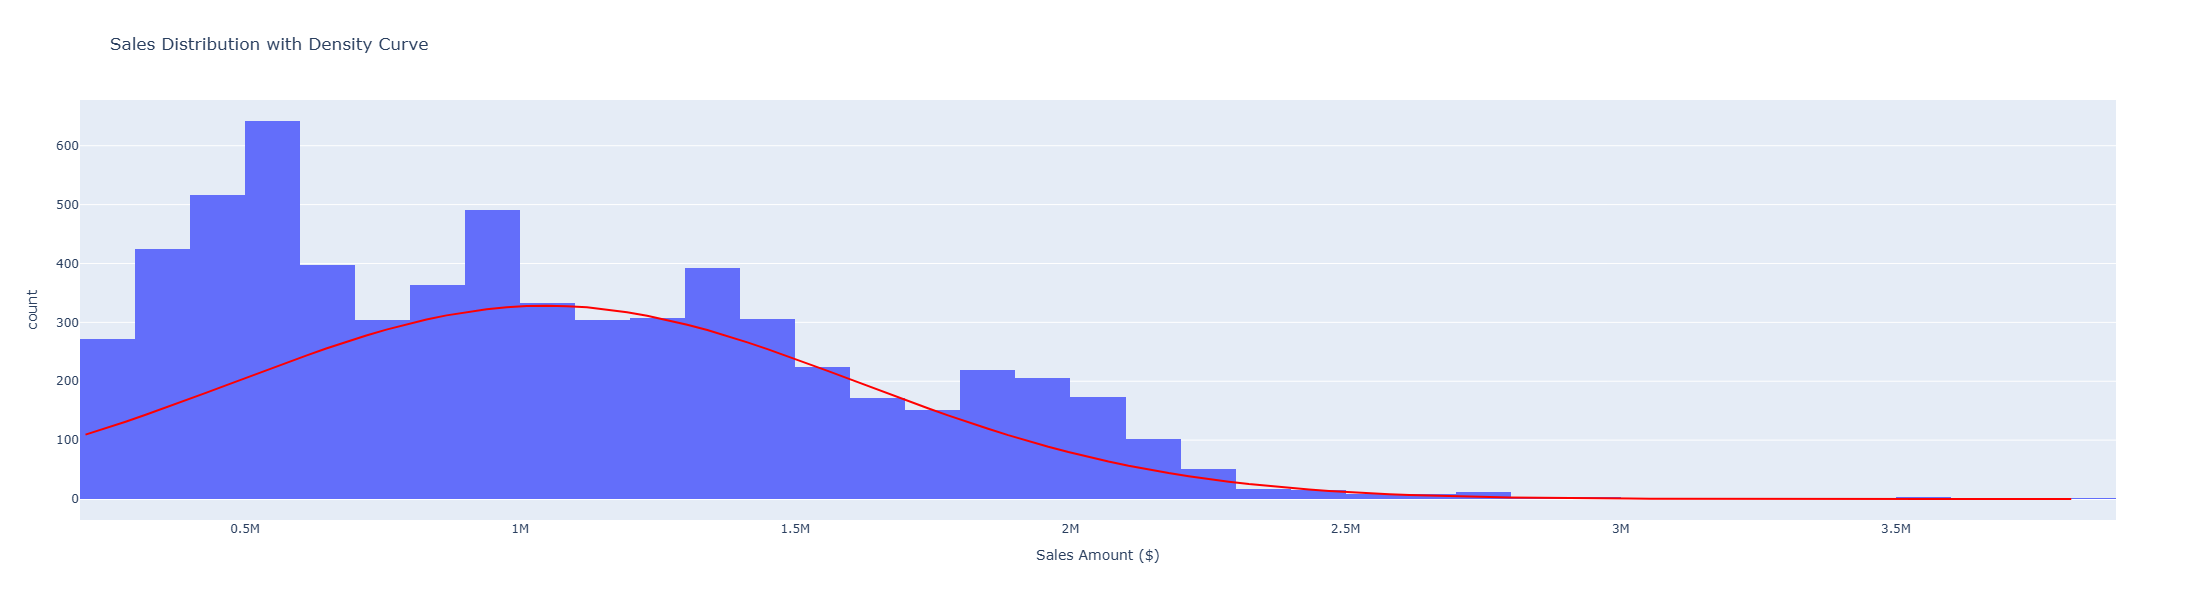

In [35]:
# Sales distribution & outlier detection with distribution line
if "sales" in key_columns:
    # Create histogram
    fig = px.histogram(data, x=key_columns["sales"], nbins=50, 
                       title="Sales Distribution with Density Curve",
                       labels={key_columns["sales"]: 'Sales Amount ($)'})
    
    # Add distribution line (density curve) without legend
    fig.add_trace(go.Scatter(
        x=np.linspace(data[key_columns["sales"]].min(), data[key_columns["sales"]].max(), 100),
        y=np.exp(-(np.linspace(data[key_columns["sales"]].min(), data[key_columns["sales"]].max(), 100) - 
                  data[key_columns["sales"]].mean())**2 / (2 * data[key_columns["sales"]].std()**2)) * 
          (len(data) * (data[key_columns["sales"]].max() - data[key_columns["sales"]].min()) / 50) / 
          (data[key_columns["sales"]].std() * np.sqrt(2 * np.pi)),
        mode='lines',
        line=dict(color='red', width=2),
        showlegend=False  # This removes the legend entry
    ))
    fig.update_layout(
    width=1000,  # Width in pixels
    height=600   # Height in pixels
    )
    fig.show()

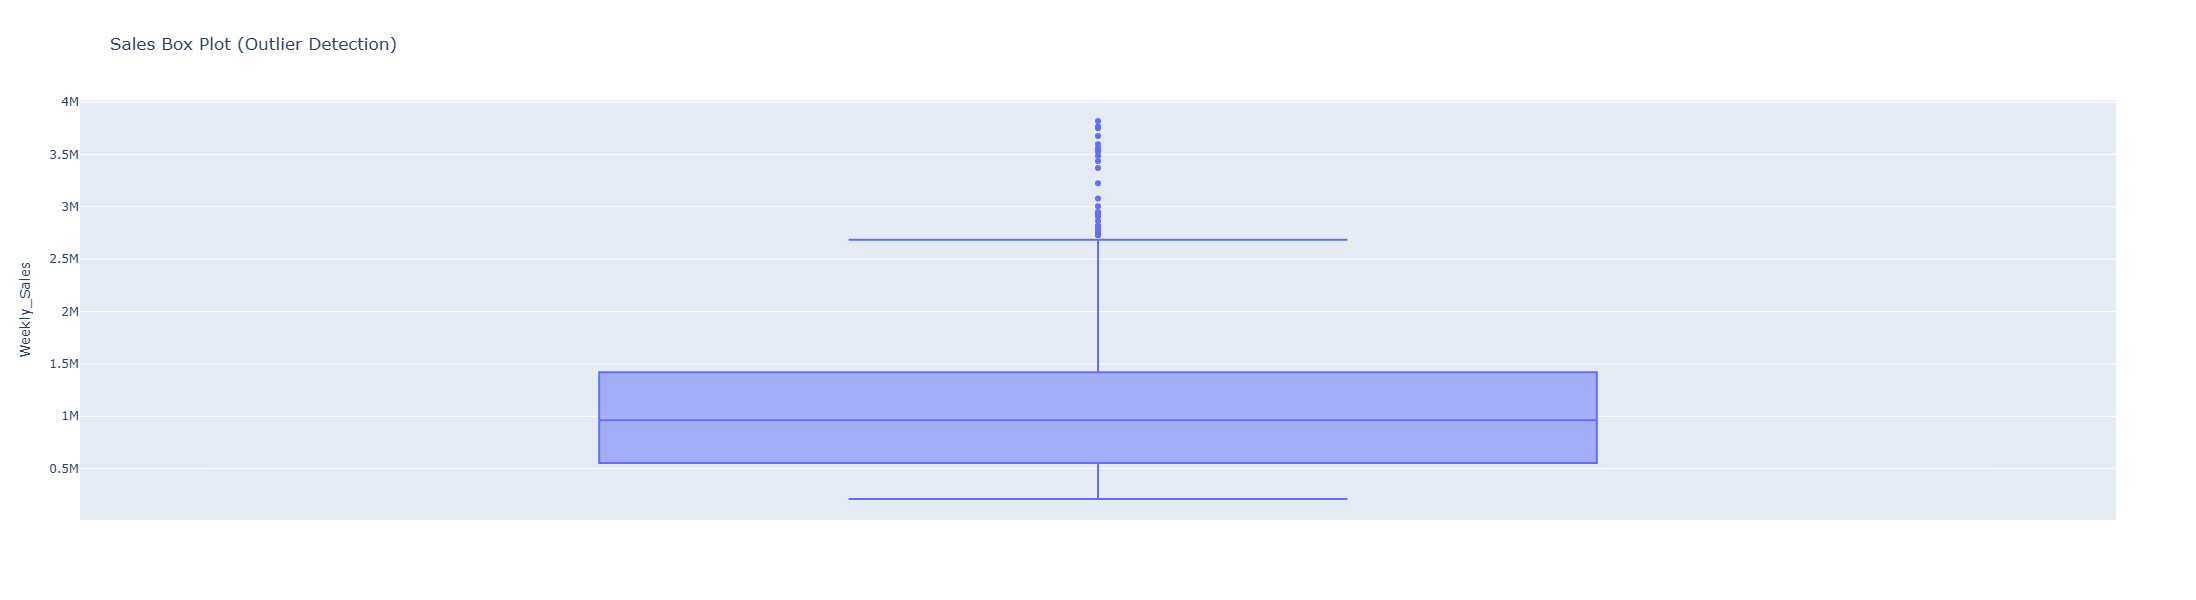

In [37]:
fig = px.box(data, y=key_columns["sales"], title="Sales Box Plot (Outlier Detection)")
fig.update_layout(
        width=1000,  # Width in pixels
        height=600   # Height in pixels
    )
fig.show()

In [41]:
# YEARLY SALES ANALYSIS (Jan–Sept Only)

# Read the CSV file
df = pd.read_csv('SalesReport.csv')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# Extract year and month
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Filter Jan–Sept
df_jan_sept = df[df['Month'] <= 9]

# Yearly Sales Analysis (Jan–Sept only)
yearly_sales = df_jan_sept.groupby('Year')['Weekly_Sales'].sum().reset_index()
yearly_sales.columns = ['Year', 'Total_Sales']

# Calculate YoY growth
yearly_sales['YoY_Growth'] = yearly_sales['Total_Sales'].pct_change() * 100
yearly_sales['YoY_Growth_Amount'] = yearly_sales['Total_Sales'].diff()

# Format numbers for readability
yearly_sales['Total_Sales_Formatted'] = yearly_sales['Total_Sales'].apply(lambda x: f"${x:,.2f}")
yearly_sales['YoY_Growth_Formatted'] = yearly_sales['YoY_Growth'].apply(lambda x: f"{x:.2f}%" if not pd.isna(x) else "N/A")
yearly_sales['YoY_Growth_Amount_Formatted'] = yearly_sales['YoY_Growth_Amount'].apply(lambda x: f"${x:,.2f}" if not pd.isna(x) else "N/A")

# Display yearly sales results
print("=" * 50)
print("JAN–SEPT SALES ANALYSIS")
print("=" * 50)
print("Yearly Sales Summary (Jan–Sept):")
print(yearly_sales[['Year', 'Total_Sales_Formatted', 'YoY_Growth_Formatted', 'YoY_Growth_Amount_Formatted']].to_string(index=False))

# Calculate insights
if len(yearly_sales) > 1:
    avg_growth = yearly_sales['YoY_Growth'].mean()
    print(f"\nAverage Growth (Jan–Sept): {avg_growth:.2f}%")
    
    if len(yearly_sales) > 2:
        growth_trend = "accelerating" if yearly_sales['YoY_Growth'].iloc[-1] > yearly_sales['YoY_Growth'].iloc[-2] else "decelerating"
        print(f"Growth Trend: {growth_trend}")

# Business Insights & Recommendations (similar structure as before)


JAN–SEPT SALES ANALYSIS
Yearly Sales Summary (Jan–Sept):
 Year Total_Sales_Formatted YoY_Growth_Formatted YoY_Growth_Amount_Formatted
 2010     $1,575,421,234.70                  N/A                         N/A
 2011     $1,781,634,387.64               13.09%             $206,213,152.94
 2012     $1,718,999,080.29               -3.52%             $-62,635,307.35

Average Growth (Jan–Sept): 4.79%
Growth Trend: decelerating


In [71]:

# YEARLY SALES ANALYSIS

# Read the CSV file
df = pd.read_csv('SalesReport.csv')

# Convert Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# Extract year from Date
df['Year'] = df['Date'].dt.year

# Yearly Sales Analysis
yearly_sales = df.groupby('Year')['Weekly_Sales'].sum().reset_index()
yearly_sales.columns = ['Year', 'Total_Sales']

# Calculate YoY growth
yearly_sales['YoY_Growth'] = yearly_sales['Total_Sales'].pct_change() * 100
yearly_sales['YoY_Growth_Amount'] = yearly_sales['Total_Sales'].diff()

# Format the numbers for better readability
yearly_sales['Total_Sales_Formatted'] = yearly_sales['Total_Sales'].apply(lambda x: f"${x:,.2f}")
yearly_sales['YoY_Growth_Formatted'] = yearly_sales['YoY_Growth'].apply(lambda x: f"{x:.2f}%" if not pd.isna(x) else "N/A")
yearly_sales['YoY_Growth_Amount_Formatted'] = yearly_sales['YoY_Growth_Amount'].apply(lambda x: f"${x:,.2f}" if not pd.isna(x) else "N/A")

# Display yearly sales results
print("=" * 50)
print("YEARLY SALES ANALYSIS")
print("=" * 50)
print("Yearly Sales Summary:")
print(yearly_sales[['Year', 'Total_Sales_Formatted', 'YoY_Growth_Formatted', 'YoY_Growth_Amount_Formatted']].to_string(index=False))

# Calculate insights
if len(yearly_sales) > 1:
    avg_growth = yearly_sales['YoY_Growth'].mean()
    print(f"\nAverage Yearly Growth: {avg_growth:.2f}%")
    
    # Check if growth is accelerating or decelerating
    if len(yearly_sales) > 2:
        growth_trend = "accelerating" if yearly_sales['YoY_Growth'].iloc[-1] > yearly_sales['YoY_Growth'].iloc[-2] else "decelerating"
        print(f"Growth Trend: {growth_trend}")

# Business Insights & Recommendations
insights = []
recommendations = []

# Sales distribution analysis
total_sales = df['Weekly_Sales'].sum()
avg_sales = df['Weekly_Sales'].mean()
median_sales = df['Weekly_Sales'].median()

insights.append(f"💰 Total Sales: ${total_sales:,.0f}")
insights.append(f"📊 Avg vs Median Sales: ${avg_sales:,.2f} vs ${median_sales:,.2f}")

if avg_sales > median_sales * 1.2:
    insights.append("📈 Sales are right-skewed (some very large transactions).")
    recommendations.append("🎯 Focus on replicating high-value sales patterns.")

# Store performance analysis
store_perf = df.groupby('Store')['Weekly_Sales'].sum()
top_store = store_perf.idxmax()
bottom_store = store_perf.idxmin()
gap = store_perf.max() / store_perf.min()

insights.append(f"🏪 Performance gap: {gap:.1f}x between best (Store {top_store}) and worst (Store {bottom_store}).")
recommendations.append(f"📋 Replicate best practices from Store {top_store}.")
if gap > 3:
    recommendations.append("🔍 Investigate underperforming stores.")

# Add yearly insights
if len(yearly_sales) > 1:
    insights.append(f"📈 Consistent YoY growth: {avg_growth:.2f}% average annual increase")
    if yearly_sales['YoY_Growth'].iloc[-1] < yearly_sales['YoY_Growth'].iloc[-2]:
        insights.append("⚠️ Growth rate slowing in most recent year")
        insights.append("📊 The performance of the recent year compared with YoY (Jan - Sept) is  -3.52%")
        recommendations.append("📊 Investigate reasons for slowing growth in the most recent year")
    
    recommendations.append("📅 Analyze Q4 performance each year (typically highest sales period)")

# Display insights and recommendations
print("\n" + "=" * 50)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 50)
print("🔍 Key Insights:")
for i in insights:
    print("-", i)

print("\n🚀 Recommendations:")
for r in recommendations:
    print("-", r)

YEARLY SALES ANALYSIS
Yearly Sales Summary:
 Year Total_Sales_Formatted YoY_Growth_Formatted YoY_Growth_Amount_Formatted
 2010     $2,288,886,120.41                  N/A                         N/A
 2011     $2,448,200,007.35                6.96%             $159,313,886.94
 2012     $2,000,132,859.35              -18.30%            $-448,067,148.00

Average Yearly Growth: -5.67%
Growth Trend: decelerating

BUSINESS INSIGHTS & RECOMMENDATIONS
🔍 Key Insights:
- 💰 Total Sales: $6,737,218,987
- 📊 Avg vs Median Sales: $1,046,964.88 vs $960,746.04
- 🏪 Performance gap: 8.1x between best (Store 20) and worst (Store 33).
- 📈 Consistent YoY growth: -5.67% average annual increase
- ⚠️ Growth rate slowing in most recent year
- 📊 The performance of the recent year compared with YoY (Jan - Sept) is  -3.52%

🚀 Recommendations:
- 📋 Replicate best practices from Store 20.
- 🔍 Investigate underperforming stores.
- 📊 Investigate reasons for slowing growth in the most recent year
- 📅 Analyze Q4 performan